In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

In [2]:
df1_1 = pd.read_csv("D:/study/machime learnong/credit card/fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv("D:/study/machime learnong/credit card/fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [4]:
#checking the null values
df.isnull().sum()


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

The data set we have collected is clean and has no null values


Distribution of Dependent Variable

In [5]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


This is highly imbalanced class data, so later we need to balance the dependent variable

In [6]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [7]:
#Converting data type of trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

#Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

#Derive 'Day of Week' Feature from 'Transaction Time' Feature
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']
#Derive 'Year Month' Feature from 'Transaction Time' Feature
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']


0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

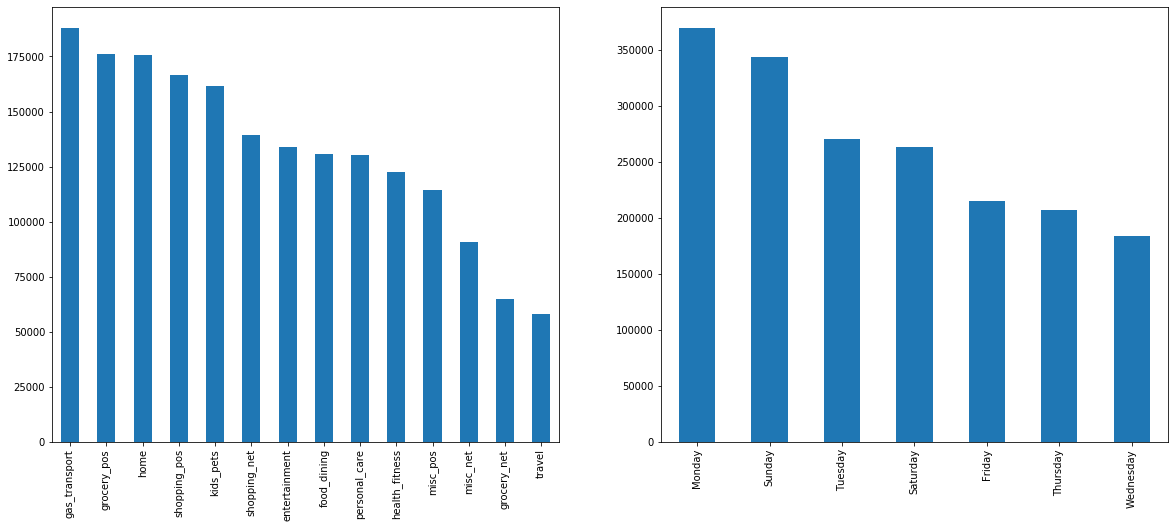

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

Sunday and Monday of the week have highest credit card transactions

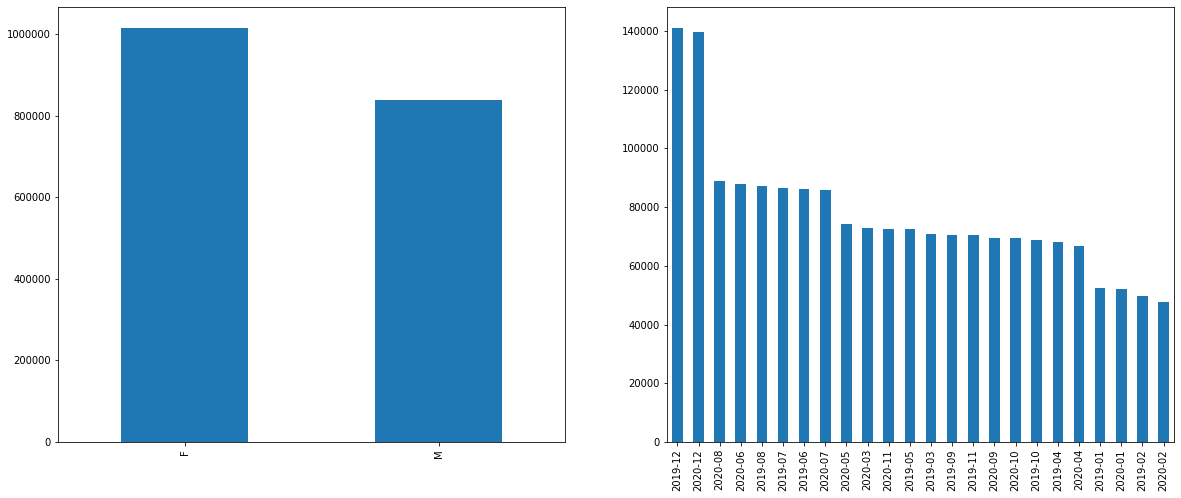

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();


Highest number of Transactions are in month of December

Lowest number of Transactions happens in February

In [10]:
#Derive Age of the Customer:


df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']
df['age'].describe()

count   1852394.000000
mean         46.266173
std          17.412388
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

33-57 age people are 50% of our customers

Minimum age of customer is 14

Maximum age of customer is 96

In [11]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1852394.000000,1842743.000000,9651.000000
1,mean,70.063567,67.651278,530.661412
2,std,159.253975,153.548108,391.028873
3,min,1.000000,1.000000,1.060000
4,50%,47.450000,47.240000,390.000000
5,95%,195.340000,189.590000,1084.090000
6,99.9%,1517.241050,1519.622580,1293.127000
7,max,28948.900000,28948.900000,1376.040000


Fraud Transaction mean is way higher than non-fraud transaction

Mean of Non Fraud Transactions: 67.6

Mean of Fraud Transactions: 530.6

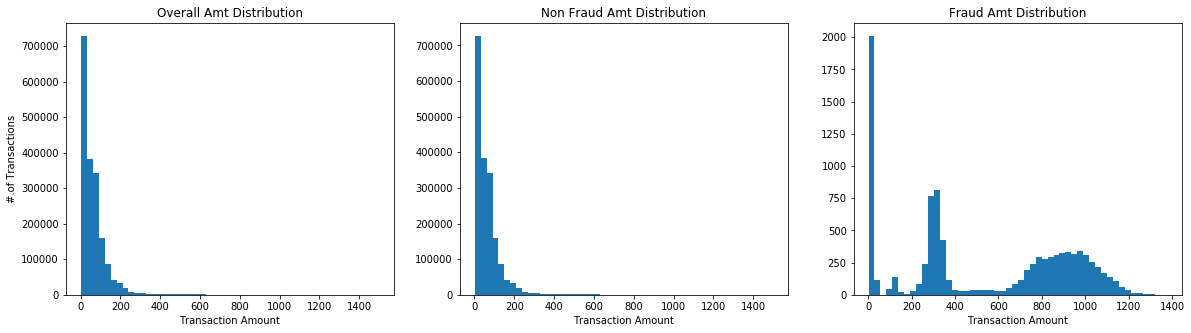

In [12]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

In [13]:
df_timeline01 = df[['trans_num','cc_num']].groupby(df['year_month']).nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01



,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


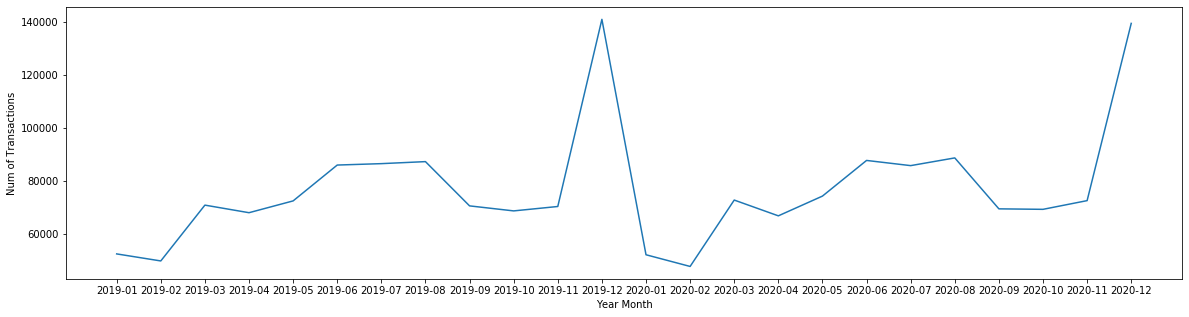

In [15]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

Timeline Plots

Year Month vs Number of Transactions

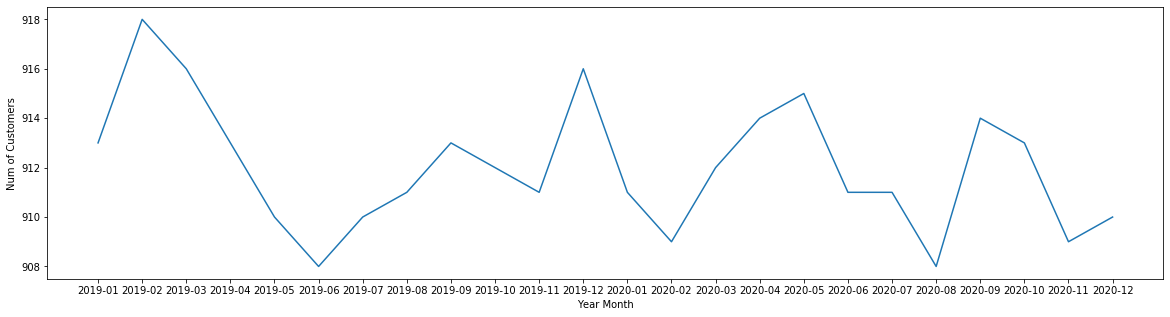

In [16]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

Year Month vs Number of Customers Done the Transaction

In [17]:
#FRAUD Transactions

df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


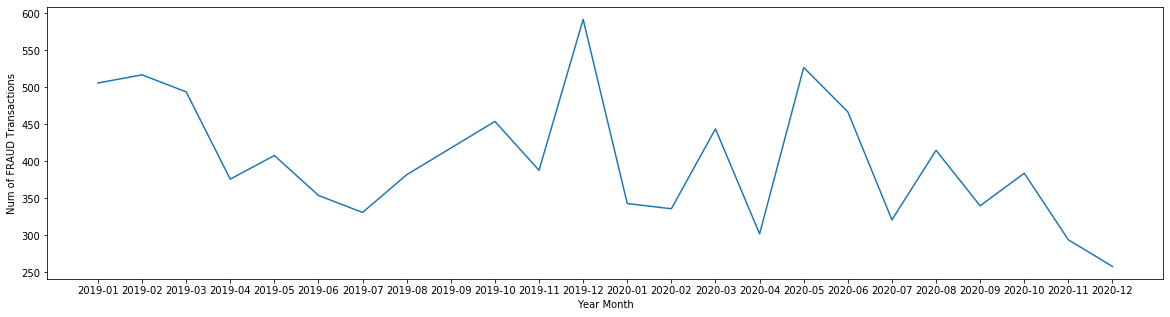

In [18]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of FRAUD Transactions')
plt.show()

Fraud transaction vs Year month

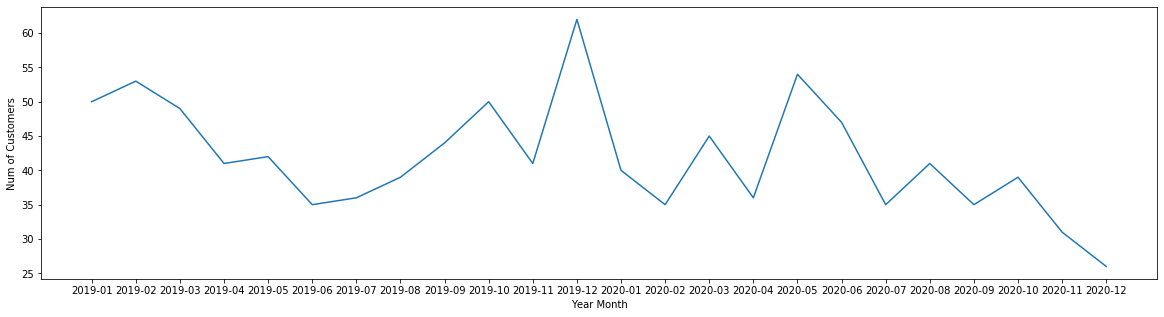

In [19]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

No. of Fraud customers vs Year month

In [20]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


Females customers are higher than male

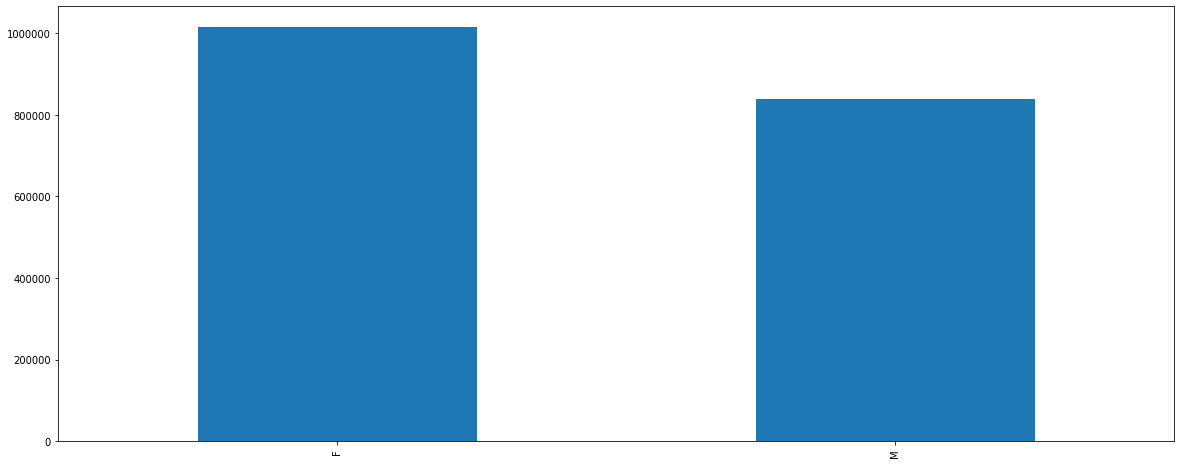

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,1,1)
df['gender'].value_counts().plot.bar();



In [22]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100
df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


In [23]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


gas_transport holds for 10% of the transactions

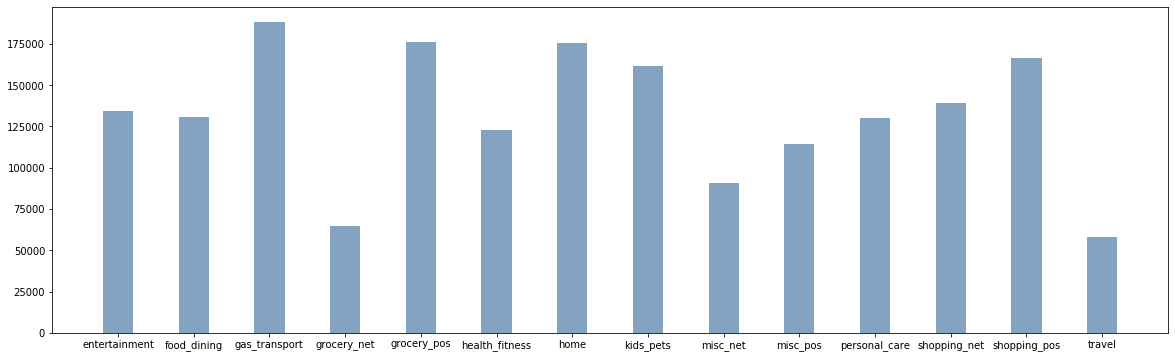

In [24]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [25]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


grocery_pos and shopping_net has more number of fraud transactions compared to other categories

In [26]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


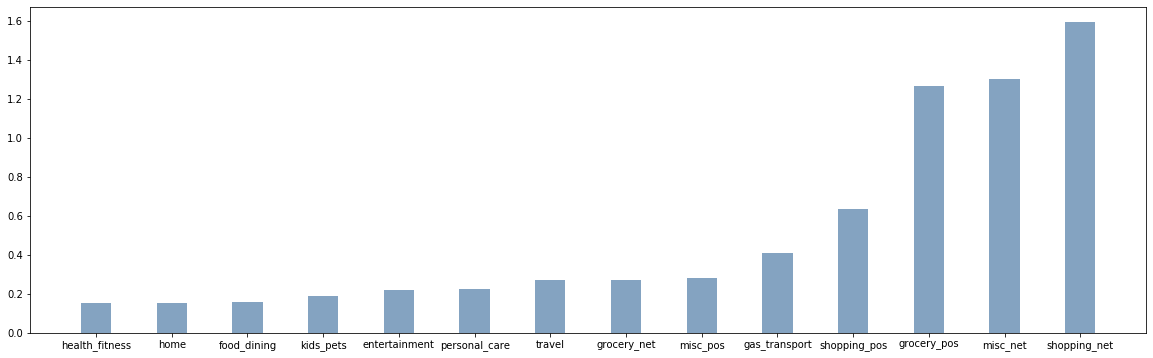

In [27]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

Using one hot encoding

In [28]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [29]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [30]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [31]:
df1['val_for_agg'] = 1


Finding transaction history for various intervals 60 days, 24 hours, 2 hours

In [32]:
#60 days transactions by customer
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.head()


,cc_num,time_index,val_for_agg
0,60416207185,2019-01-01 12:47:15,0.000000
1,60416207185,2019-01-02 08:44:57,1.000000
2,60416207185,2019-01-02 08:47:36,2.000000
3,60416207185,2019-01-02 12:38:14,3.000000
4,60416207185,2019-01-02 13:10:46,4.000000


In [33]:
df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,1.000000
2,60416207185,2019-01-03,5.000000
3,60416207185,2019-01-04,7.000000
4,60416207185,2019-01-05,9.000000


In [42]:
#24 hours order by customer
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.000000
1,60416207185,2019-01-02 08:44:57,1.000000
2,60416207185,2019-01-02 08:47:36,2.000000
3,60416207185,2019-01-02 12:38:14,3.000000
4,60416207185,2019-01-02 13:10:46,4.000000


In [39]:
#24 hrs fraud historic transactions
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']
df_hist_fraud_trans_24h.head()


,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,3.000000
4,60416207185,2019-03-02 22:10:59,2.000000


In [40]:
#2 Hours Fraud by Customers

df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,1.000000
4,60416207185,2019-03-02 22:10:59,1.000000


In [37]:
#60 Day Orders Amt Avg by Customers
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [43]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


In [44]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [45]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

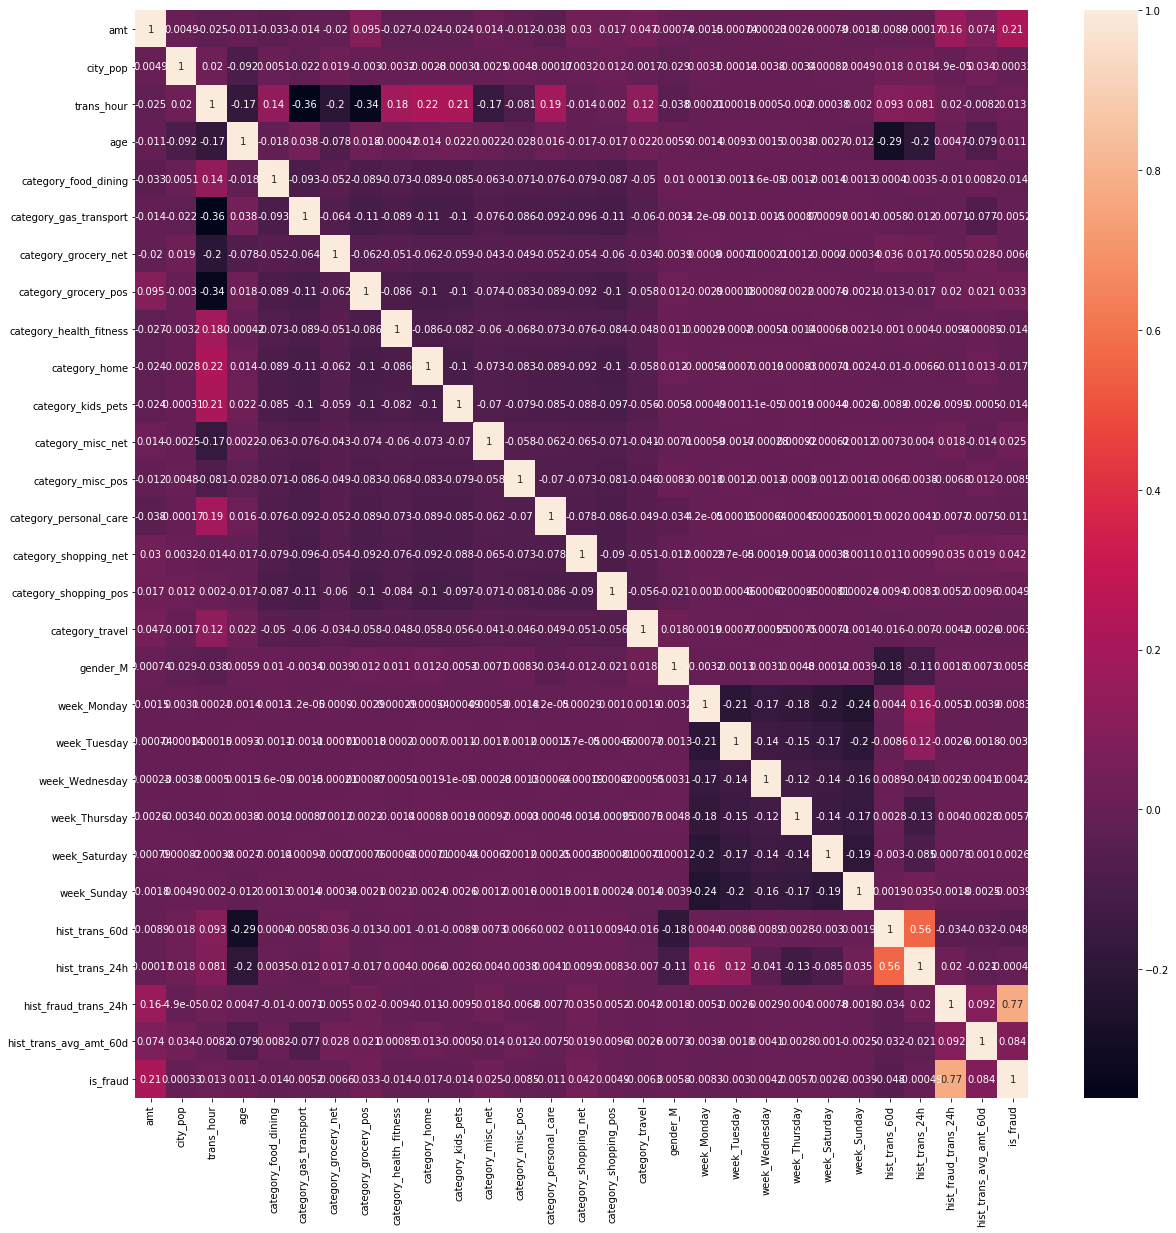

In [46]:
#finding the correlation between the columns
corr = df2[cols].corr()

import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

hist_fraud_trans_24h is highly correlated with is_fraud - 0.77

hist_trans_24h is also correlated with hist_trans_60d - 0.56

In [47]:
import plotly
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split

X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d']

Y_cols = ['is_fraud']


In [80]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df2[X_cols],df2[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
#As this dataset is highly imbalance we have to balance this by over sampling




In [81]:
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]
#OverSampling

df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1842831
0    1842831
Name: is_fraud, dtype: int64


In [49]:
df2_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


Train and test split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [49]:
X_train.shape

(2579963, 28)

In [51]:
X_test.shape

(1105699, 28)

Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X1_test)

NameError: name 'X_train' is not defined

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Train Results")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Train Results
[[1195381   94627]
 [ 308277  981678]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86   1290008
           1       0.91      0.76      0.83   1289955

    accuracy                           0.84   2579963
   macro avg       0.85      0.84      0.84   2579963
weighted avg       0.85      0.84      0.84   2579963



In [100]:
print("Test Results")
print(confusion_matrix(y1_test, y_test_pred))
print(classification_report(y1_test, y_test_pred))

Test Results
[[512423  40414]
 [   661   2247]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    552837
           1       0.05      0.77      0.10      2908

    accuracy                           0.93    555745
   macro avg       0.53      0.85      0.53    555745
weighted avg       0.99      0.93      0.96    555745



Training data:

Accuracy - 84%

recall - 76%

Testing data:

Accuracy - 85%

recall - 77%

Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [91]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1267883   22125]
 [  40779 1249176]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98   1290008
           1       0.98      0.97      0.98   1289955

    accuracy                           0.98   2579963
   macro avg       0.98      0.98      0.98   2579963
weighted avg       0.98      0.98      0.98   2579963



In [92]:
print("Test Results")
pred_test = dt_clf.predict(X1_test)

print(confusion_matrix(y1_test, pred_test))
print(classification_report(y1_test, pred_test))

Test Results
[[543410   9427]
 [   108   2800]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552837
           1       0.23      0.96      0.37      2908

    accuracy                           0.98    555745
   macro avg       0.61      0.97      0.68    555745
weighted avg       1.00      0.98      0.99    555745



Training data:

Accuracy - 98%

recall - 98%

Testing data:

Accuracy - 97%

recall - 98%

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 5,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=1, warm_start=False)

In [94]:
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.3s finished


[[1269584   20424]
 [  65757 1224198]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97   1290008
           1       0.98      0.95      0.97   1289955

    accuracy                           0.97   2579963
   macro avg       0.97      0.97      0.97   2579963
weighted avg       0.97      0.97      0.97   2579963



In [95]:
print("Test Results")
pred_test = rf_clf.predict(X1_test)

print(confusion_matrix(y1_test, pred_test))
print(classification_report(y1_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


[[544118   8719]
 [   162   2746]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552837
           1       0.24      0.94      0.38      2908

    accuracy                           0.98    555745
   macro avg       0.62      0.96      0.69    555745
weighted avg       1.00      0.98      0.99    555745



Training data:

Accuracy - 97%

recall - 95%

Testing data:

Accuracy - 98

recall - 94%

In [96]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_train = gnb.predict(X_train)
print("train results")
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

train results
[[1255058   34950]
 [ 533915  756040]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.82   1290008
           1       0.96      0.59      0.73   1289955

    accuracy                           0.78   2579963
   macro avg       0.83      0.78      0.77   2579963
weighted avg       0.83      0.78      0.77   2579963



In [97]:
print("Test Results")
pred_test = gnb.predict(X1_test)

print(confusion_matrix(y1_test, pred_test))
print(classification_report(y1_test, pred_test))

Test Results
[[537864  14973]
 [  1181   1727]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    552837
           1       0.10      0.59      0.18      2908

    accuracy                           0.97    555745
   macro avg       0.55      0.78      0.58    555745
weighted avg       0.99      0.97      0.98    555745



To conclude, Decision Tree and Random Forest are the best models as they have highest recall